# S-method with NUFFT

In [1]:
using PyPlot
import DSP

In [2]:
include("../juwvid.jl")

juwvid

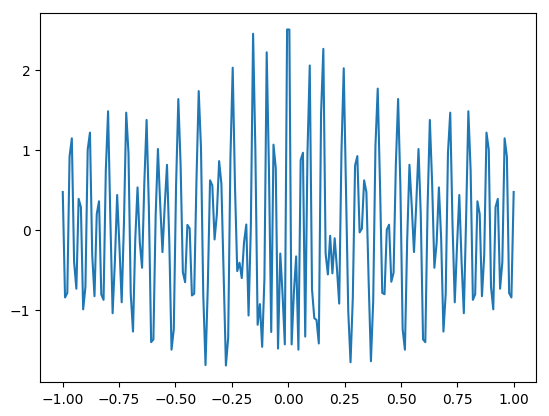

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f954646bdd8>

In [3]:
# multicomponent data (modified Example 6.2.2)
nsample=200
t,x=sampledata.genmultifm622x(nsample);
PyPlot.plot(t,x)

Single Wigner Ville


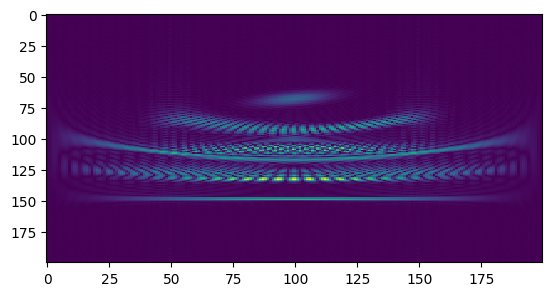

Use fft.


PyObject <matplotlib.image.AxesImage object at 0x7f9546400ac8>

In [4]:
# Wigner Ville suffers the cross talk
z=DSP.Util.hilbert(x);
tfr=cohenclass.tfrwv(z);
PyPlot.imshow(abs.(tfr[end:-1:1,:]),aspect=0.5)

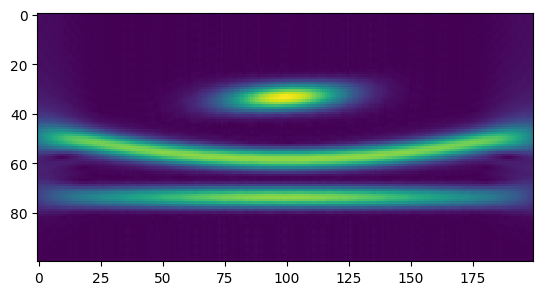

Use fft.


PyObject <matplotlib.image.AxesImage object at 0x7f954566af60>

In [5]:
# STFT does not, but it's a poor resolution
tfrstfta=stft.tfrstft(x);
PyPlot.imshow(abs.(tfrstfta[100:-1:1,:]))

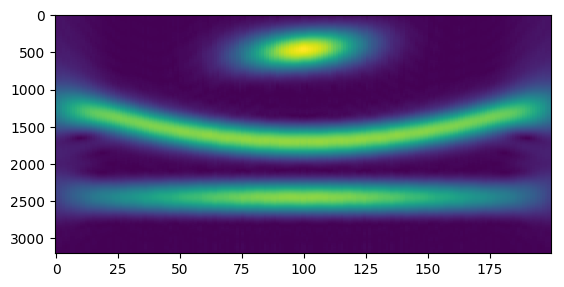

Use nufft.


PyObject <matplotlib.image.AxesImage object at 0x7f95453baf28>

In [6]:
# The results of the STFT w/ NUFFT shows that the poor resolution is not due to the sampling rate
fin=collect(linspace(10,75,nsample*16));
tfrstft=stft.tfrstft(x,NaN,NaN,fin,NaN,NaN,4);
PyPlot.imshow(abs.(tfrstft[end:-1:1,:]),aspect=0.03)

Single S-method


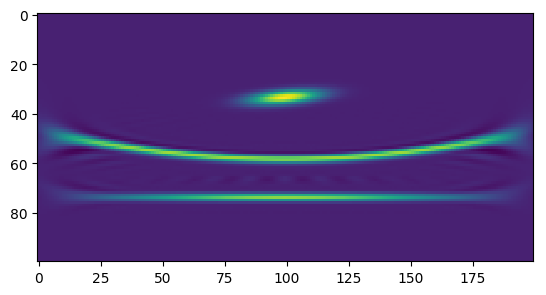

Use fft.


PyObject <matplotlib.image.AxesImage object at 0x7f9540411a58>

In [13]:
# The S-method w/o NuFFT suppresses the cross talk. 
sm=smethod.tfrsm(x,NaN,5,NaN,2)
PyPlot.imshow(Real.(sm[100:-1:1,:]))

Single S-method


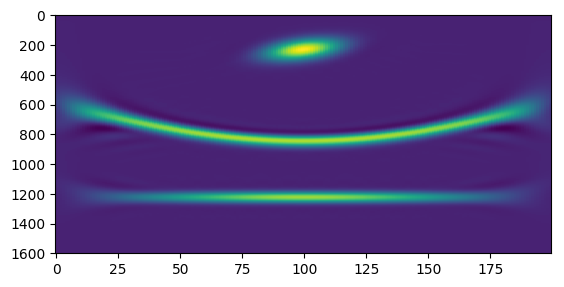

Use nufft.


PyObject <matplotlib.image.AxesImage object at 0x7f95403f29e8>

In [14]:
# The S-method w/ NuFFT improves the sampling rate.
fin=collect(linspace(10,75,nsample*8));
sm=smethod.tfrsm(x,NaN,100,fin,2)
PyPlot.imshow(Real.(sm[end:-1:1,:]),aspect=0.06)